In [ ]:
import os, sys, django

# 1. 프로젝트 루트 디렉토리 경로 설정
# 'b:\AISM_v1' 경로를 Python 라이브러리 검색 경로에 추가합니다.
# (노트북 파일 위치와 상관없이 절대 경로를 사용하는 것이 가장 확실합니다)
PROJECT_PATH = r'b:\AISM_v1'

if PROJECT_PATH not in sys.path:
    sys.path.insert(0, PROJECT_PATH)

# 2. Django 설정 모듈 지정 ('config.settings')
os.environ.setdefault('DJANGO_SETTINGS_MODULE', 'config.settings')

# 3. Jupyter(비동기 환경)에서 Django ORM 사용 허용
os.environ["DJANGO_ALLOW_ASYNC_UNSAFE"] = "true"

# 4. Django 초기화 (앱 로딩)
django.setup()

# 5. 모델 임포트 테스트
from asct.models import ServerInfo, SSHInfo

print(SSHInfo.objects.all())

성공: 모델을 임포트했습니다.
ServerInfo count: 5
<QuerySet [<SSHInfo: root@192.168.219.206:22>, <SSHInfo: root@192.168.219.7:22>, <SSHInfo: root@192.168.219.111:22>, <SSHInfo: root@192.168.219.209:22>, <SSHInfo: root@192.168.219.210:22>]>


In [ ]:
import numpy as np
darray = np.array([[1,2,3], 
                [5,6,7]])
print(darray, darray.shape, darray.ndim)

[[1 2 3]
 [5 6 7]] (2, 3) 2


In [ ]:
import pandas as pd
df = pd.read_excel('testfile/server_info_list.xlsx', sheet_name="Server Info", engine="openpyxl")
# print(df.head)
# print(df.drop(columns=['IP2', 'Kernel', 'Last Updated']))

In [ ]:
df = pd.read_excel('testfile/cpu_usage_list.xlsx', engine="openpyxl")
clean_df = df.drop(columns=['Confirmed','Comment'])
print(clean_df.iloc[0:11])

In [3]:
import requests
res = requests.get("https://api.github.com")
print(res.status_code)

200


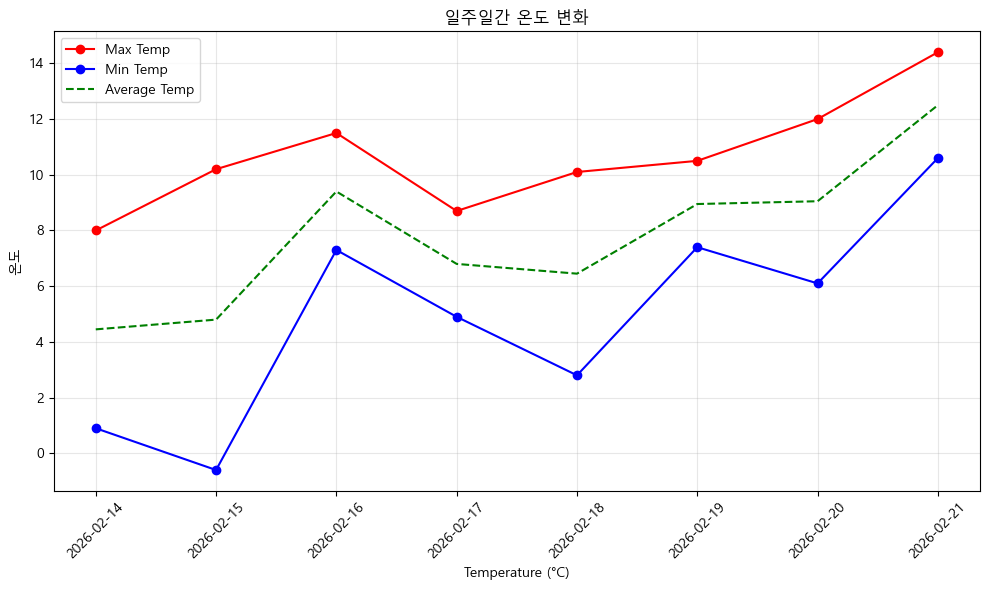

In [44]:
from pprint import pprint
import pandas as pd
import requests
import matplotlib.pyplot as plt
from pathlib import Path

# api call
latitude = 48.85
longitude = 2.35
from datetime import datetime, timedelta
today = datetime.now()
td_week = timedelta(days=7)
week_ago = today - td_week
start=week_ago.strftime('%Y-%m-%d')
end=today.strftime('%Y-%m-%d')

url = f"https://api.open-meteo.com/v1/forecast?latitude={latitude}&longitude={longitude}&start_date={start}&end_date={end}&daily=temperature_2m_max,temperature_2m_min"

response = requests.get(url)
data = response.json()
daily_data = data['daily']

# data frame: Pandas
df = pd.DataFrame({
    'date': daily_data['time'],
    'max': daily_data['temperature_2m_max'],
    'min': daily_data['temperature_2m_min']})
df['date'] = pd.to_datetime(df['date'])
df['avg'] = (df['max'] + df['min']) / 2

output_path_csv = Path('data/weather.csv')
output_path_csv.parent.mkdir(parents=True, exist_ok=True)
df.to_csv(output_path_csv)

# graphic : Matplotlib
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['max'],'r-o', label='Max Temp')
plt.plot(df['date'], df['min'], 'b-o', label='Min Temp')
plt.plot(df['date'], df['avg'], 'g--', label='Average Temp')
plt.title("일주일간 온도 변화")
plt.xlabel("Temperature (°C)")
plt.ylabel('온도')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()

output_path_img = Path('images/my_plot.png')
output_path_img.parent.mkdir(parents=True, exist_ok=True)
plt.savefig(output_path_img)
plt.show()
